# Data Sprint 95 - Media Campaign Cost Prediction
Predict Cost to run a media campaign for US FoodMarts

**Overview**


Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately 325 stores located in the US. Convenient Food Mart operates on the franchise system.

Food Mart was the nation's third-largest chain of convenience stores as of 1988.

The NASDAQ exchange dropped Convenient Food Mart the same year when the company failed to meet financial reporting requirements.

Carden & Cherry advertised Convenient Food Mart with the Ernest character in the 1980s.

 
**Challenge**

Your Task is to devise a Machine Learning Model that helps us to predict cost on media campaigns in the food marts on the basis of the features provided.


For more details: the Data, Dataset description, Competitors, Leadershipboard, click [here](https://dphi.tech/challenges/data-sprint-95-media-campaign-cost-prediction/304/data)

## Install and Import dependencies

In [1]:
!pip3 install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# for data analysis and manipultion
import pandas as pd
# Fundamental package for linear algebra and multidimensional arrays 
import numpy as np 

# for visualization
import seaborn as sns
from matplotlib import pyplot as plt


# for preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for modeling data
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors

# for checking performance
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error


## Read train and test data into dataframes and view the first five rows

In [3]:
df_train = pd.read_csv('train_dataset.csv')
df_train.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20
3,11.73,3.0,1.0,1.0,3.0,10.90,1.0,1.0,15.0,23112.0,1.0,1.0,1.0,1.0,1.0,60.87
4,4.82,2.0,1.0,1.0,3.0,8.15,0.0,0.0,7.0,38382.0,0.0,0.0,0.0,0.0,0.0,86.79


In [4]:
df_test = pd.read_csv('test_dataset.csv')
df_test.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,2.65,5.0,4.0,1.0,4.0,6.89,0.0,1.0,5.0,33858.0,1.0,0.0,1.0,1.0,1.0
1,8.34,3.0,0.0,0.0,1.0,9.71,1.0,1.0,28.0,20319.0,0.0,0.0,0.0,0.0,0.0
2,3.54,2.0,4.0,0.0,2.0,20.90,1.0,0.0,15.0,30797.0,1.0,1.0,1.0,1.0,1.0
3,5.60,2.0,3.0,2.0,2.0,11.00,1.0,0.0,33.0,20319.0,0.0,0.0,0.0,0.0,0.0
4,4.80,3.0,2.0,0.0,4.0,17.40,1.0,0.0,36.0,30268.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis
Let's explore the data a bit.

#### Number of rows and columns in the train data
There are 

*   51363 rows (instances or observations) and 

*   16 columns (features)

As seen below:

In [6]:
df_train.shape

(51363, 16)

#### Data type and number of non-null in the train data
 Of the 51363 observtions, there are:

*   zero null values 

*   all features have float data-type

As shown below:



In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51363 entries, 0 to 51362
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_sales(in millions)    51363 non-null  float64
 1   unit_sales(in millions)     51363 non-null  float64
 2   total_children              51363 non-null  float64
 3   num_children_at_home        51363 non-null  float64
 4   avg_cars_at home(approx).1  51363 non-null  float64
 5   gross_weight                51363 non-null  float64
 6   recyclable_package          51363 non-null  float64
 7   low_fat                     51363 non-null  float64
 8   units_per_case              51363 non-null  float64
 9   store_sqft                  51363 non-null  float64
 10  coffee_bar                  51363 non-null  float64
 11  video_store                 51363 non-null  float64
 12  salad_bar                   51363 non-null  float64
 13  prepared_food               513

#### Descriptive statistics of the train data

In [8]:
df_train.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000
mean,6.531792,3.091194,2.538111,0.832019,2.199424,13.805512,0.558437,0.351148,18.856550,27979.153593,0.612367,0.353776,0.588011,0.588011,0.561825,99.327064
std,3.464902,0.827293,1.489316,1.303775,1.109080,4.622431,0.496578,0.477334,10.263746,5701.145280,0.487215,0.478145,0.492198,0.492198,0.496168,30.023458
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.800000,3.000000,1.000000,0.000000,1.000000,9.700000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,3.000000,3.000000,0.000000,2.000000,13.600000,1.000000,0.000000,19.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.640000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,30797.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


### Check for outliers and feature scale

There are few features little outliers (not too vsible). Examples are: 'store_sales(in millions)',	'unit_sales(in millions)'	and 'num_children_at_home'.

The scale of the features are not uniform. Example is 'store_sqft'.

There is need for scaling the features.

This is shown by the boxplot below:

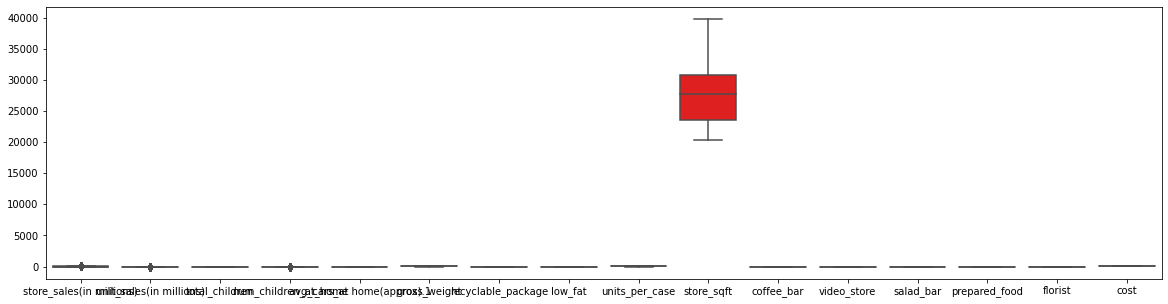

In [9]:
plt.figure(figsize=(20,5))

sns.boxplot(
    data=df_train,
    color='red')


### Pairplot of train data



*   Some features are skewed. Example: 'num_children_at_home', 'low_fat', 'store_sqft'.

As shown below:



<Figure size 360x360 with 0 Axes>

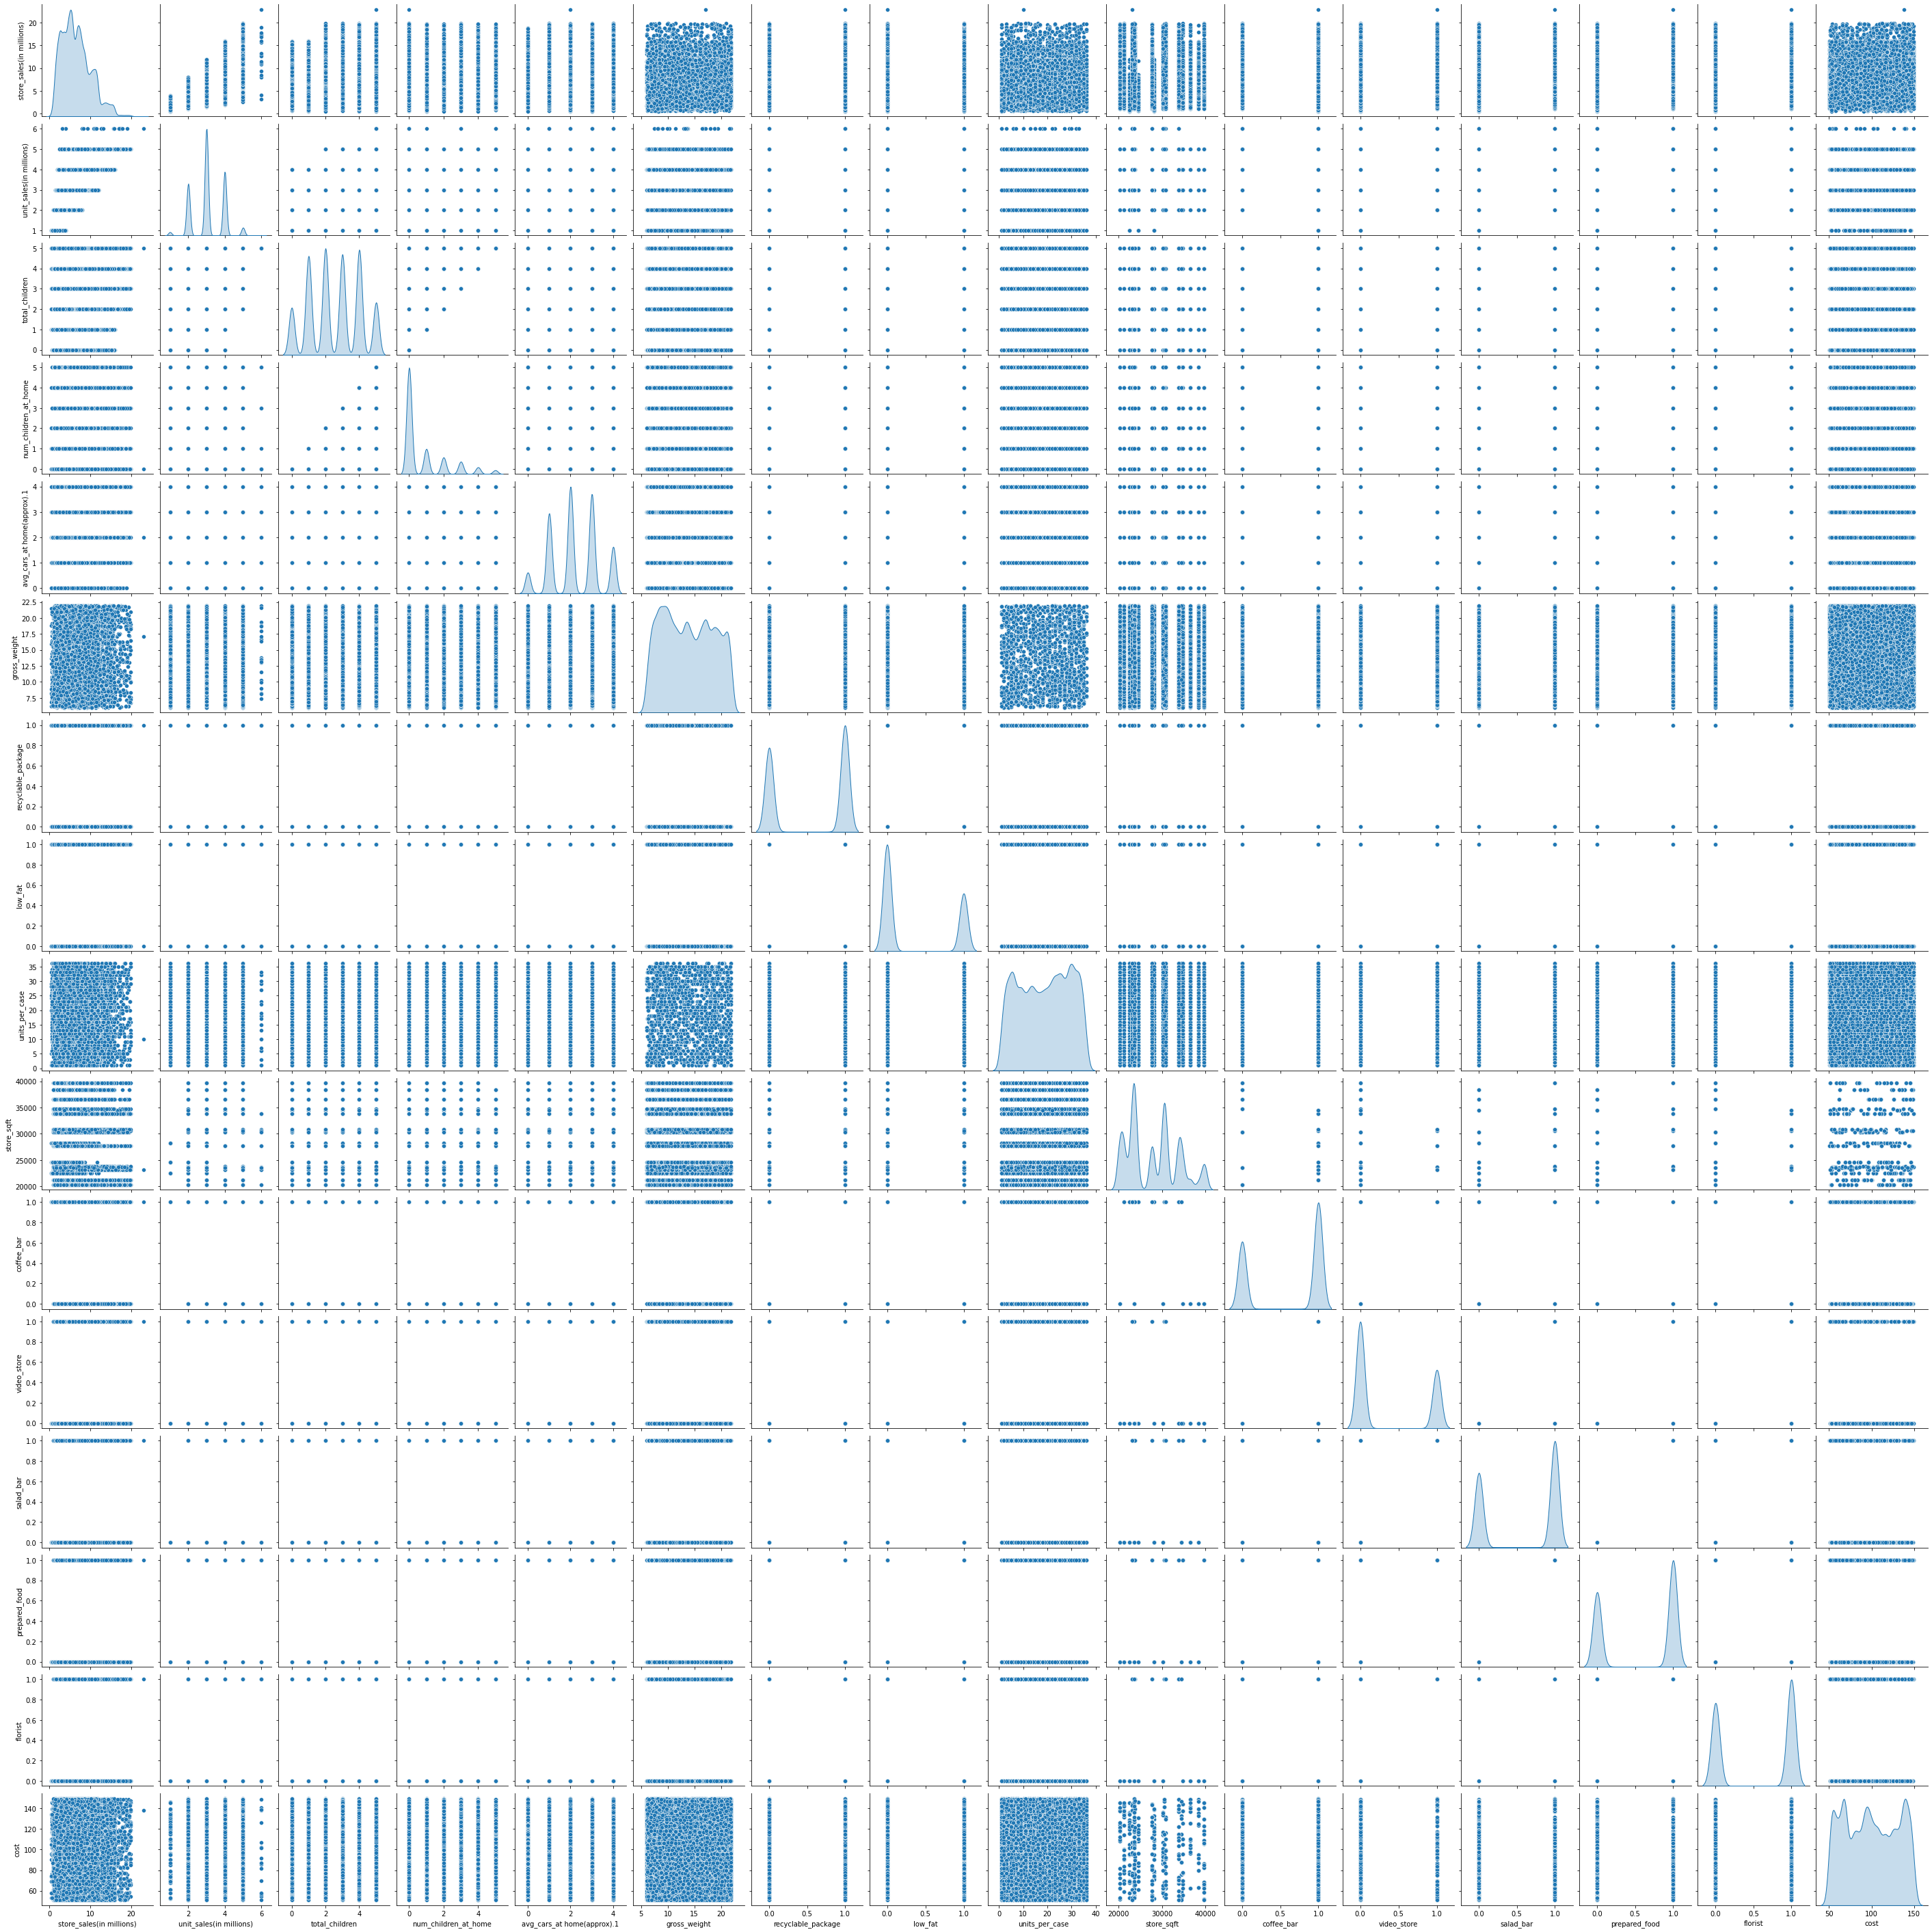

In [10]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df_train, diag_kind='kde')

### The correlation between features


*   Few features are autocorrelated. there is a perfect correlation between 'sald_bar' and 'prepared_food'.


*   'coffee_bar',	'video_store',	'salad_bar',	'prepared_food'and	'florist' have correlations amongst themselves.

These can be seen in the visualization below:





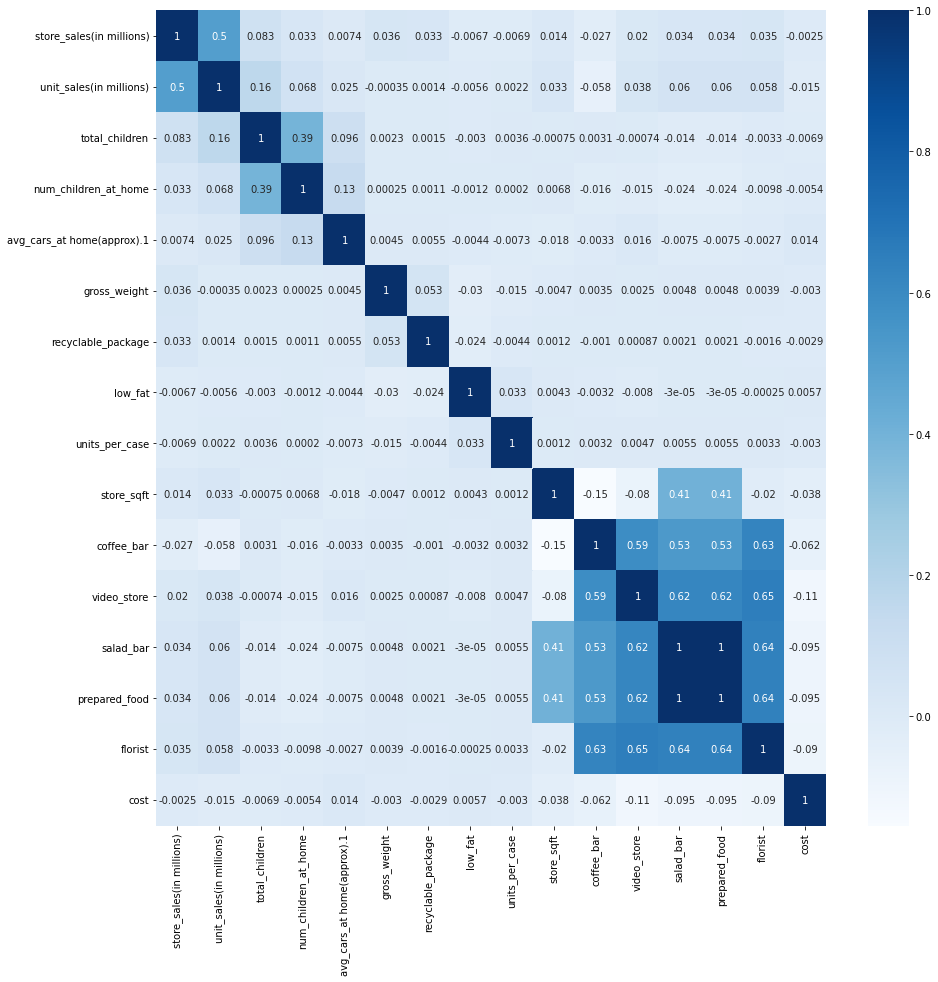

In [11]:
plt.figure(figsize=(15,15))

sns.heatmap(df_train.corr(), cmap='Blues', annot=True)
plt.show()


## Preprocessing


#### Split train data into predictors and target (X and y)

In [5]:
# define predictors data
X = df_train.drop('cost', axis = 1) 

# define targetvariables
y = df_train['cost'] 


Next we split our dataset into training and testing sets so that we can later evaluate the performance of the model

In [6]:
# Set test size to 20 % of training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Normalise X train and X test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Normalise test set
test_scaler = scaler.transform(df_test)

## Training the Individual Models
Now, let's train multiple machine learning models on the same data. We'll train a linear regression, a gradient booster regression and a random forest regression.

### Linear Regression

In [7]:
# Instantiate linear regression model
lr = LinearRegression()

# train the data by fitting in a linear regression model
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
#  make prediction with X_test data
y_pred = lr.predict(X_test)

# Evaluate result from the linear regression model
print("Accuracy of the Linear Regression model is",r2_score(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)), '\nMAE: ',mean_absolute_error(y_test, y_pred))


Accuracy of the Linear Regression model is 0.014044616915314001
RMSE:  29.795373833839346 
MAE:  25.704896452343522


### Random Forest Regression

In [9]:
# Building a Random Forest Machine on train data
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 0) 

# train the data by fitting in a randon forest regression model
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [10]:
#  make prediction with X_test data
pred_rfr = rfr.predict(X_test)

# Evaluate result from the random forest regression model
print("Accuracy of the Random Forest Regression model is",r2_score(y_test,pred_rfr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,pred_rfr)), '\nMAE: ',mean_absolute_error(y_test, pred_rfr))


Accuracy of the Random Forest Regression model is 0.014605735632587824
RMSE:  29.78689417967947 
MAE:  25.388298911252374


### KNeighbors Regression

In [11]:
K = 168
k_model = neighbors.KNeighborsRegressor(n_neighbors = K)

k_model.fit(X_train, y_train) 


KNeighborsRegressor(n_neighbors=168)

In [12]:
#  make prediction with X_test data
k_pred = k_model.predict(X_test)
# Evaluate result from the random forest regression model
print("Accuracy of the K-neighbor model is",r2_score(y_test,k_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,k_pred)), '\nMAE: ',mean_absolute_error(y_test, k_pred))


Accuracy of the K-neighbor model is 0.021319073849229042
RMSE:  29.68525402520624 
MAE:  25.60188948839538


### CatBoost Regression Model

In [13]:
c_model = CatBoostRegressor(iterations=3,
                          learning_rate=1,
                          depth=4)
c_model.fit(X_train, y_train)

0:	learn: 29.4118576	total: 57.8ms	remaining: 116ms
1:	learn: 29.2395064	total: 65ms	remaining: 32.5ms
2:	learn: 29.2063664	total: 70ms	remaining: 0us


In [14]:
#  make prediction with X_test data
c_pred = c_model.predict(X_test)

# Evaluate result from the gradient boosting regression model
print("Accuracy of the Gradient Boosting Regression model is",r2_score(y_test,c_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,c_pred)), '\nMAE: ',mean_absolute_error(y_test, c_pred))


Accuracy of the Gradient Boosting Regression model is 0.05309859800550287
RMSE:  29.199309893423372 
MAE:  25.23377493069645


### Gradient Boosting Regression

In [15]:
gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 4, random_state = 0)

# train the data by fitting in a gradient booster regression model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, random_state=0)

In [16]:
#  make prediction with X_test data
pred_gbr = gbr.predict(X_test)

# Evaluate result from the gradient boosting regression model
print("Accuracy of the Gradient Boosting Regression model is",r2_score(y_test,pred_gbr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,pred_gbr)), '\nMAE: ',mean_absolute_error(y_test, pred_gbr))


Accuracy of the Gradient Boosting Regression model is 0.05828917363369901
RMSE:  29.11916981846723 
MAE:  25.140158338684188


## Homogeneous Ensembles
These consist of the same type of model

### Boosting
Boosting ensembles are built by combining multiple 'weak models

Between the random forest and gradient booster, gradient booster performed better, so was used for the bagging regressor

In [24]:
# Instantiate gradient booster regression model to use as the base model
boost_gbr = GradientBoostingRegressor(max_depth=4)

# Instantiate AdaBoostRegressor model with a gradient booster as the base model
bst_reg = AdaBoostRegressor(base_estimator = boost_gbr)

# train the data by fitting in a boosting ensemble model
bst_reg.fit(X_train,y_train)


AdaBoostRegressor(base_estimator=GradientBoostingRegressor(max_depth=4))

In [25]:
#  make prediction with X_test data
boost_pred = bst_reg.predict(X_test)

# Evaluate result from the boosting regression model
print("Accuracy of the boosting regressor model is",r2_score(y_test,boost_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,boost_pred)), '\nMAE: ',mean_absolute_error(y_test, boost_pred))

Accuracy of the boosting regressor model is 0.05297330681775336
RMSE:  29.201241612607976 
MAE:  25.385892397124177


### Bagging Regressor
Bagging involves training the models of the ensemble on different subsets of the training data. Particularly on subsets which are sampled with replacement from the training data. As such, the resulting 'bag' of models are together more stable due to decreased variance error.

The predictions are made by aggregating the predictions of all the models in the bag.

Here, between the random forest and gradient booster, gradient booster performed better, so was used for the boosting regressor



In [26]:
bag_gbr = GradientBoostingRegressor(max_depth=4)

# Instantiate BaggingRegressor model with a gradient booster as the base model
bag_reg = BaggingRegressor(base_estimator = bag_gbr)

# train the data by fitting in a bagging ensemble model
bag_reg.fit(X_train,y_train)

BaggingRegressor(base_estimator=GradientBoostingRegressor(max_depth=4))

In [27]:
#  make prediction with X_test data
bag_pred = bag_reg.predict(X_test)

# Evaluate result from the bagging regression model
print("Accuracy of the bagging regressor model is",r2_score(y_test,bag_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,bag_pred)), '\nMAE: ',mean_absolute_error(y_test, bag_pred))

Accuracy of the bagging regressor model is 0.05782666809262649
RMSE:  29.12631963760646 
MAE:  25.15417162533419


## Heterogeneous Ensembles
This type of ensemble consists of different types of models, so we can add pretty much any regression model we want.

### Voting Regressor

In [28]:
# Define the models which we'll include in our ensemble as a list of tuples. 
models = [("LR",lr),("RF",rfr),("GBR",gbr)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.1,0.1,0.8])

v_reg = VotingRegressor(estimators=models,weights=model_weightings)

# train the data by fitting in a voting ensemble model
v_reg.fit(X_train,y_train)


VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('RF',
                             RandomForestRegressor(n_estimators=1000,
                                                   random_state=0)),
                            ('GBR',
                             GradientBoostingRegressor(max_depth=4,
                                                       random_state=0))],
                weights=array([0.1, 0.1, 0.8]))

In [29]:
#  make prediction with X_test data
v_pred = v_reg.predict(X_test)

# Evaluate result from the voting regression model
print("Accuracy of the voting regressor model is",r2_score(y_test,v_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,v_pred)), '\nMAE: ',mean_absolute_error(y_test, v_pred))

Accuracy of the voting regressor model is 0.05930631402194253
RMSE:  29.103439784972604 
MAE:  25.145495804968064


### Stacking Regressor

The outputs of multiple trained base models (sometimes called base learners) are fed into another model (referred to as a meta model or meta learner).

Again, we chose the gradient booster because it out-performed the linear regression model.

In [17]:
# Define the models which we'll include in our ensemble as a list of tuples. 
models = [("LR",lr),("RF",rfr),("GBR",gbr)]

# Instead of choosing model weightings, we now declare the meta learner 
meta_learner_reg = GradientBoostingRegressor()

s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

# train the data by fitting in a stacking ensemble model
s_reg.fit(X_train,y_train)

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('RF',
                               RandomForestRegressor(n_estimators=1000,
                                                     random_state=0)),
                              ('GBR',
                               GradientBoostingRegressor(max_depth=4,
                                                         random_state=0))],
                  final_estimator=GradientBoostingRegressor())

In [18]:
#  make prediction with X_test data
s_pred = s_reg.predict(X_test)

# Evaluate result from the stacking regression model
print("Accuracy of the stacking regressor model is",r2_score(y_test,s_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,s_pred)), '\nMAE: ',mean_absolute_error(y_test, s_pred))

Accuracy of the stacking regressor model is 0.061555269163856785
RMSE:  29.0686295708421 
MAE:  25.09575159366709


### Creating Submission Files from best performing models

In [ ]:
#  make prediction with test data
test_stacking = s_reg.predict(test_scaler)

# To create Dataframe for prediction
submission = pd.DataFrame(test_stacking)
submission.columns = ["cost"]

submission.to_csv('stacking_regressor.csv', index = False)


In [ ]:
#  make prediction with test data
test_voting = v_reg.predict(test_scaler)

# To create Dataframe for prediction
submission = pd.DataFrame(test_voting)
submission.columns = ["cost"]

submission.to_csv('voting_regressor.csv', index = False)
